# Ekko
Ekko is an app that analyzes soundwaves from any audio input and returns a tablature or score of the notes or chords being played on the sample.

[https://musicinformationretrieval.com/index.html](https://musicinformationretrieval.com/index.html)

## Process
The process of Ekko is very similar to what is happening to a Tuner.<br>
The soundwave's frequency is analyzed and transformed into a musical note. The succession of notes, however is being recorded and transcribed as a tablature or a score.

## Requirements
- [`pydub`](http://pydub.com/): For audio format conversion to .wav
- [`wave`](https://docs.python.org/3/library/wave.html): For .wav analysis and reading
- [`numpy`](https://numpy.org/): For calculations of frequencies
- [`kord`](https://pypi.org/project/kord/): For the music notation
- pyaudio ?


This documentation needs to be updated as the project takes shape.

[good link](https://www.youtube.com/watch?v=at2NppqIZok)

## Test: open file as binary
The basic idea is to open a "*.wav*" file as a regular file with:
```python
with open(song_path, "r") as file:
    print(file.read())
```

### Results
Reading the file with option "r" results in `UnicodeDecodeError: 'utf-8' codec can't decode byte 0x88 in position 4: invalid start byte`.

Reading the file with option "rb" results in `IOPub data rate exceeded.`

This means we need a real means of reading the file.

## Specifics of Sound Processing
All audio formats (`mp3`, `wav`, `flac`, ...) have a standard mesure of ***frequency*** mesured in `kHz`. The frequency can also be called ***sample rate***. The frequency represents the amount of *"packages*" per second that are used to represent our sound.

In [1]:
import sys
import wave
import audioop
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variables

a_path = "440khz.wav"
song_path = "doremi.wav"

In [3]:
def convertSongExtension(song):
    if song.endswith(".mp3"):
        original_song = AudioSegment.from_mp3(song)
    
    if song.endswith(".aac"):
        original_song = AudioSegment.from_aac(song)

    if song.endswith(".ogg"):
        original_song = AudioSegment.from_ogg(song)
    
    if song.endswith(".mp4"):
        original_song = AudioSegment.from_mp4(song)
    
    original_song.export("working.wav", format="wav")
    
    return "working.wav"


In [4]:
song = song_path if song_path.endswith(".wav") else convertSongExtension(song_path)

with wave.open(song) as wav:
    wav_byte = wav.readframes(-1)
    int_wav_byte = np.frombuffer(wav_byte, dtype="int16")
    print("Framerate: ", wav.getframerate())
    print("Total Samples: ", wav.getnframes())
    print(wav.readframes(10000))

Framerate:  44100
Total Samples:  237913
b''


In [15]:
x = 0
l = []
for i in int_wav_byte:
    if i != 0 and x < 8000:
        l.append(i)
        x += 1

print(sum(l)/len(l))

-8.364625


## Graphing a soundwave

/home/nootaku/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


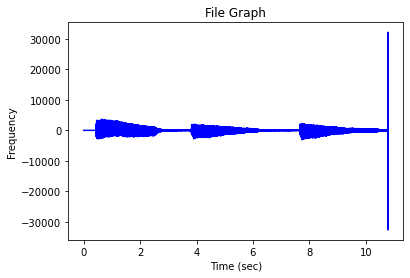

In [12]:
with wave.open(song_path, "rb") as file:
    # return byte-object of all the frames of the audio file (-1 = all frames)
    raw_audio = file.readframes(-1)
    # return an array of the byte-object
    array_raw_audio = np.frombuffer(raw_audio, "Int16") # .wav is incoded with 16 bits per sample (hence the "Int16" argument)
    
    # Exit if wav is stereo
    if file.getnchannels() == 2:
        print("Stereo File detected. Use mono File")
        sys.exit(0)
    
    # Get time instead of Frames
    sample_rate = file.getframerate()
    time = np.linspace(0, len(array_raw_audio) / sample_rate, num=len(array_raw_audio))
    
    # Plot
    plt.title("File Graph")
    plt.plot(time, array_raw_audio, color="blue")
    plt.xlabel("Time (sec)")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
notes = {
    "a": [27.5, 55.00, 110.00, 220.00, 440.00, 880.00, 1760.00, 3520.00, 7040.00],
    "b": [30.87, 61.74, 123.47, 246.94, 493.88, 987.77, 1975.53, 3951.07, 7902.13],
    "c": [16.35, 32.70, 65.41, 130.81, 261.63, 523.25, 1046.50, 2093.00, 4186.01],
    "d": [18.35, 36.71, 73.42, 146.83, 293.66, 587.33, 1174.66, 2349.32, 4698.63],
    "e": [20.60, 41.20, 82.41, 164.81, 329.63, 659.25, 1318.51, 2637.02, 5274.04],
    "f": [21.83, 43.65, 87.31, 174.61, 349.23, 698.46, 1396.91, 2793.83, 5587.65],
    "g": [24.50, 49.00, 98.00, 196.00, 392.00, 783.99, 1567.98, 3135.96, 6271.93],
}